# Pre-processing and Training Data
In this notebook the data set is further preprocessed to meet the criteria for the modeling step. This includes further analysis of the relevant features and creating a training data set.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
from IPython.display import display

## Load the Data

In [9]:
df = pd.read_sql('SELECT * FROM data_dummies ', 'sqlite:///../data/data2.db',index_col='index')
df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39047 entries, 0 to 39168
Data columns (total 118 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id_013           39047 non-null  object
 1   id_001           39047 non-null  object
 2   id_004           39047 non-null  object
 3   id_006           39047 non-null  object
 4   id_008           39047 non-null  object
 5   id_026           39047 non-null  object
 6   dt_001           39047 non-null  object
 7   error            39047 non-null  int64 
 8   xx_006_0         39047 non-null  int64 
 9   xx_006_1         39047 non-null  int64 
 10  xx_006_2         39047 non-null  int64 
 11  xx_006_3         39047 non-null  int64 
 12  xx_016_0         39047 non-null  int64 
 13  xx_016_1         39047 non-null  int64 
 14  xx_016_2         39047 non-null  int64 
 15  xx_016_3         39047 non-null  int64 
 16  xx_028_0         39047 non-null  int64 
 17  xx_028_1         39047 non-nul

## Reduce the number of features

In [79]:
df_analysis = pd.DataFrame(df.nunique(),columns=['nunique'])
no1 = []
no1_cnt = []
no2 = []
no2_cnt = []
for v in df.columns:
    no1.append(df.loc[:,v].value_counts().index[0])
    no1_cnt.append(df.loc[:,v].value_counts().iloc[0])
    no2.append(df.loc[:,v].value_counts().index[1])
    no2_cnt.append(df.loc[:,v].value_counts().iloc[1])
nvals = len(df.iloc[:,0])
df_analysis['no1'] = no1
df_analysis['# no1'] = no1_cnt
df_analysis['% no1'] = np.round(np.array(no1_cnt)/nvals*100,1)
df_analysis['no2'] = no2
df_analysis['# no2'] = no2_cnt
df_analysis['% no2'] = np.round(np.array(no2_cnt)/nvals*100,1)

df_analysis

,nunique,no1,# no1,% no1,no2,# no2,% no2
id_013,205,id_013_unknown,34632,88.7,190050,136,0.3
id_001,2844,id_001_unknown,1704,4.4,id_001_000,1194,3.1
id_004,846,0102,5940,15.2,0120,5622,14.4
id_006,683,id_006_unknown,16427,42.1,0102,6556,16.8
id_008,638,id_008_unknown,25610,65.6,0120,4093,10.5
id_026,2584,id_026_unknown,32044,82.1,424086.0,20,0.1
dt_001,10673,2020-04-15 08:11:24,63,0.2,2020-04-27 11:54:49,57,0.1
error,2,0,37161,95.2,1,1886,4.8
xx_006_0,2,0,32861,84.2,1,6186,15.8
xx_006_1,2,0,37715,96.6,1,1332,3.4


In [84]:
df_small = df.drop(df.columns[:7],axis = 1) # Drop the first 6 id's and the time array

The remainder of our data set are *1*'s and *0*'s and each feature is complete in the sense that e.g. every data point (row) is associated to one day of the week and one category of **ty_006** features.

We will now take out the sparsest category per feature to further reduce the data set.

In [85]:
cols = df_small.columns
k = 0
while k < len(cols):
    var = cols[k]
    if '_' in var:
        v = var.split('_')[0]+'_'+var.split('_')[1]
        print(v)
        i = k+1
        while v in cols[i]:
            i+=1
        #print(cols[k+np.argmin(np.sum(df_small.loc[:,cols[k:i]].values,axis=0))])
        df_small.drop(cols[k+np.argmin(np.sum(df_small.loc[:,cols[k:i]].values,axis=0))],axis=1,inplace=True)
        
        k = i
    else:
        k+=1
        

xx_006
xx_016
xx_028
cl_002
cl_004
flg_000
ty_000
cl_000
xx_000
xx_001
cl_001
id_002
id_003
id_005
id_007
xx_005
ty_002
ty_004
cl_003
id_018
id_019
xx_014
cl_006
cl_007
cl_008
id_024
flg_001
xx_027
xx_029
ty_006


In [86]:
df_small.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39047 entries, 0 to 39168
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   error            39047 non-null  int64
 1   xx_006_0         39047 non-null  int64
 2   xx_006_1         39047 non-null  int64
 3   xx_006_3         39047 non-null  int64
 4   xx_016_0         39047 non-null  int64
 5   xx_016_2         39047 non-null  int64
 6   xx_016_3         39047 non-null  int64
 7   xx_028_0         39047 non-null  int64
 8   xx_028_1         39047 non-null  int64
 9   xx_028_2         39047 non-null  int64
 10  xx_028_3         39047 non-null  int64
 11  cl_002_unknown   39047 non-null  int64
 12  cl_004_unknown   39047 non-null  int64
 13  flg_000_unknown  39047 non-null  int64
 14  ty_000_000       39047 non-null  int64
 15  ty_000_001       39047 non-null  int64
 16  ty_000_002       39047 non-null  int64
 17  ty_000_003       39047 non-null  int64
 18  ty_000

In [88]:
np.sum(df_small.loc[:,['morning','afternoon','evening']],axis=0)

morning      15539
afternoon    19233
evening       4275
dtype: int64

In [89]:
df_small.drop(['evening','Sunday'],axis=1,inplace=True)

## Explore Data with PCA

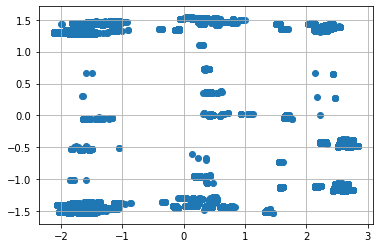

In [53]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_features = pca.fit_transform(df_small.drop('error',axis=1).values)

plt.figure()
plt.scatter(pca_features[:,0],pca_features[:,1])
plt.grid()

## Looks as if data could be clustered

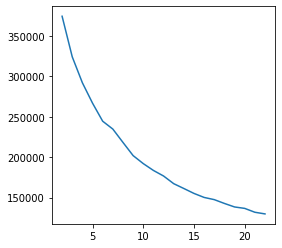

In [55]:
from sklearn.cluster import KMeans
plt.figure(figsize=(4,4))
inertia = []
df_ana = df_small.drop('error',axis=1)
for nc in range(2,23):
    kmeans = KMeans(n_clusters=nc)
    kmeans.fit(df_ana.values)
    inertia.append(kmeans.inertia_)  
plt.plot(range(2,23),inertia)


It is not too obvious where the elbow is, but keeping the PCA distribution in mind, 12 clusters are chosen.

In [69]:
 # Generate new cluster
kmeans = KMeans(n_clusters=12)
df_temp = pd.DataFrame(df_ana.copy())
df_temp['cluster'] = kmeans.fit_predict(df_ana.values)
# analyze cluster
tab = df_temp.groupby('cluster').agg(['sum','mean','std'])

In [70]:
tab.transpose().head(9)

cluster                 0            1            2            3   \
xx_006_0 sum    600.000000     3.000000  1014.000000  1200.000000   
         mean     0.163800     0.001012     0.251114     0.301129   
         std      0.370145     0.031798     0.433708     0.458806   
xx_006_1 sum    319.000000     0.000000     2.000000   627.000000   
         mean     0.087087     0.000000     0.000495     0.157340   
         std      0.282001     0.000000     0.022252     0.364167   
xx_006_3 sum   2726.000000  2962.000000  3021.000000  2122.000000   
         mean     0.744199     0.998988     0.748143     0.532497   
         std      0.436370     0.031798     0.434134     0.499005   

cluster                 4            5            6            7   \
xx_006_0 sum     29.000000   623.000000  1025.000000   525.000000   
         mean     0.010817     0.328067     0.251781     0.149105   
         std      0.103459     0.469633     0.434089     0.356243   
xx_006_1 sum      0.000000   107.000000     2.000000    84.000000   
         mean     0.000000     0.056345     0.000491     0.023857   
         std      0.000000     0.230648     0.022162     0.152625   
xx_006_3 sum   2652.000000  1148.000000  3043.000000  2894.000000   
         mean     0.989183     0.604529     0.747482     0.821926   
         std      0.103459     0.489080     0.434510     0.382630   

cluster                 8            9            10           11  
xx_006_0 sum    531.000000     3.000000     4.000000   629.000000  
         mean     0.127614     0.001267     0.001197     0.267205  
         std      0.333699     0.035578     0.034586     0.442594  
xx_006_1 sum     84.000000     0.000000     0.000000   107.000000  
         mean     0.020187     0.000000     0.000000     0.045455  
         std      0.140658     0.000000     0.000000     0.208343  
xx_006_3 sum   3528.000000  2365.000000  3337.000000  1597.000000  
         mean     0.847873     0.998733     0.998803     0.678420  
         std      0.359187     0.035578     0.034586     0.467182

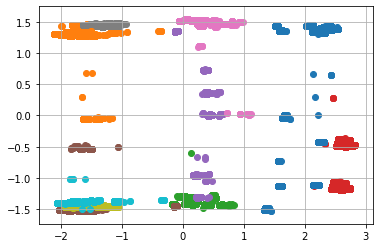

In [71]:
plt.figure()
for i in range(12):
    bool_cl = df_temp['cluster'] == i
    plt.scatter(pca_features[bool_cl,0],pca_features[bool_cl,1])
plt.grid()

It appears that the clustering is not adding more value to the data set, nor the PCA decomposition. For now they will not be included to the data set.

## Split test and training data set

In [76]:
print('Errors make up only {:.2f}% of the data set.'.format(df_small['error'].sum()/df_small['error'].count()*100))

Errors make up only 4.83% of the data set.


Therefore, the test and training set are split such that each has 4.83 % errors.

In [102]:
import scipy as sp
from sklearn.model_selection import train_test_split
y = df_small['error'].values
X = df_small.drop('error',axis=1).values
#X = sp.sparse.csr_matrix(df_small.drop('error',axis=1).values)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42,stratify=y)

In [97]:
print('In the train set errors make up {:.2f}% of the data.'.format(y_train.sum()/len(y_train)*100))
print('In the test set errors make up {:.2f}% of the data.'.format(y_test.sum()/len(y_test)*100))

In the train set errors make up 4.83% of the data.
In the test set errors make up 4.83% of the data.


## Save data sets

In [93]:
con = sqlite3.connect('../data/model_data.db')
df_small.to_sql(name='data_all', con=con, if_exists='replace')
pd.DataFrame(y_train,columns=['error']).to_sql(name='y_train', con=con, if_exists='replace')
pd.DataFrame(y_test,columns=['error']).to_sql(name='y_test', con=con, if_exists='replace')
pd.DataFrame(X_train,columns=df_small.drop('error',axis=1).columns).to_sql(name='X_train', con=con, if_exists='replace')
pd.DataFrame(X_test,columns=df_small.drop('error',axis=1).columns).to_sql(name='X_test', con=con, if_exists='replace')
con.close()

In [94]:
con = sqlite3.connect('../data/model_data.db')
cursor = con.cursor()
cursor.execute("SELECT name FROM sqlite_master WHERE type = 'table';")
print(cursor.fetchall())
con.close()

[('data_all',), ('y_train',), ('y_test',), ('X_train',), ('X_test',)]
